In [1]:
# Import
import json
import math
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
# from fastai.structured import add_datepart

# Linear Regression
from sklearn.linear_model import LogisticRegression

In [10]:
# Read data from local repo
df = pd.read_csv('data/daily_sentimental.csv')

# Add STOCH indicator

In [12]:
symbl = 'AAPL'
apiKey = 'MSXSR0YHC991CZN6'

# Fetch SMA Data
stoch = pd.read_csv('https://www.alphavantage.co/query?function=STOCH&symbol=' + symbl + '&interval=daily&time_period=10&series_type=open&apikey=' + apiKey + '&datatype=csv')

In [13]:
# Drop the first row and reset index
stoch = stoch[1:].reset_index()

In [14]:
df_stoch = pd.concat([df, stoch], axis=1, join_axes=[df.index])
df_stoch.head(5)

,timestamp,open,high,low,close,volume,prev_close,action,neg,neu,pos,index,time,SlowD,SlowK
0,2000-01-03,104.8750,112.500,101.688,111.938,133949200,102.813,1.0,0.051,0.871,0.078,1,2019-10-15,86.9150,83.4605
1,2000-01-04,108.2500,110.625,101.188,102.500,128094400,111.938,0.0,0.056,0.904,0.039,2,2019-10-14,85.5056,89.1786
2,2000-01-05,103.7500,110.563,103.000,104.000,194580400,102.500,0.0,0.093,0.828,0.079,3,2019-10-11,80.6293,88.1060
3,2000-01-06,106.1183,107.000,95.000,95.000,191993200,104.000,0.0,0.079,0.835,0.086,4,2019-10-10,77.2606,79.2323
4,2000-01-07,96.5000,101.000,95.500,99.500,115183600,95.000,1.0,0.072,0.838,0.090,5,2019-10-09,74.7201,74.5496


In [18]:
# Drop abundant timestamp and index columns
df_stoch = df_stoch.drop(columns = ['index','time'])
df_stoch.head(5)

,timestamp,open,high,low,close,volume,prev_close,action,neg,neu,pos,SlowD,SlowK
0,2000-01-03,104.8750,112.500,101.688,111.938,133949200,102.813,1.0,0.051,0.871,0.078,86.9150,83.4605
1,2000-01-04,108.2500,110.625,101.188,102.500,128094400,111.938,0.0,0.056,0.904,0.039,85.5056,89.1786
2,2000-01-05,103.7500,110.563,103.000,104.000,194580400,102.500,0.0,0.093,0.828,0.079,80.6293,88.1060
3,2000-01-06,106.1183,107.000,95.000,95.000,191993200,104.000,0.0,0.079,0.835,0.086,77.2606,79.2323
4,2000-01-07,96.5000,101.000,95.500,99.500,115183600,95.000,1.0,0.072,0.838,0.090,74.7201,74.5496


# Add moving average (SMA) values

In [26]:
symbl = 'AAPL'
apiKey = 'MSXSR0YHC991CZN6'

# Fetch SMA Data
sma = pd.read_csv('https://www.alphavantage.co/query?function=SMA&symbol=' + symbl + '&interval=daily&time_period=10&series_type=open&apikey=' + apiKey + '&datatype=csv')

In [27]:
# Drop the first row and reset index
sma = sma[1:].reset_index()

In [28]:
df_sma = pd.concat([df_stoch, sma], axis=1, join_axes=[df.index])
df_sma.head(5)

,timestamp,open,high,low,close,volume,prev_close,action,neg,neu,pos,SlowD,SlowK,index,time,SMA
0,2000-01-03,104.8750,112.500,101.688,111.938,133949200,102.813,1.0,0.051,0.871,0.078,86.9150,83.4605,1,2019-10-15,227.842
1,2000-01-04,108.2500,110.625,101.188,102.500,128094400,111.938,0.0,0.056,0.904,0.039,85.5056,89.1786,2,2019-10-14,226.710
2,2000-01-05,103.7500,110.563,103.000,104.000,194580400,102.500,0.0,0.093,0.828,0.079,80.6293,88.1060,3,2019-10-11,225.310
3,2000-01-06,106.1183,107.000,95.000,95.000,191993200,104.000,0.0,0.079,0.835,0.086,77.2606,79.2323,4,2019-10-10,224.069
4,2000-01-07,96.5000,101.000,95.500,99.500,115183600,95.000,1.0,0.072,0.838,0.090,74.7201,74.5496,5,2019-10-09,223.276


In [29]:
# Drop abundant timestamp and index columns
df_sma = df_sma.drop(columns = ['index','time'])
df_sma.head(5)

,timestamp,open,high,low,close,volume,prev_close,action,neg,neu,pos,SlowD,SlowK,SMA
0,2000-01-03,104.8750,112.500,101.688,111.938,133949200,102.813,1.0,0.051,0.871,0.078,86.9150,83.4605,227.842
1,2000-01-04,108.2500,110.625,101.188,102.500,128094400,111.938,0.0,0.056,0.904,0.039,85.5056,89.1786,226.710
2,2000-01-05,103.7500,110.563,103.000,104.000,194580400,102.500,0.0,0.093,0.828,0.079,80.6293,88.1060,225.310
3,2000-01-06,106.1183,107.000,95.000,95.000,191993200,104.000,0.0,0.079,0.835,0.086,77.2606,79.2323,224.069
4,2000-01-07,96.5000,101.000,95.500,99.500,115183600,95.000,1.0,0.072,0.838,0.090,74.7201,74.5496,223.276


# Add moving average convergence / divergence (MACD) values

In [30]:
symbl = 'AAPL'
apiKey = 'MSXSR0YHC991CZN6'

# Fetch SMA Data
macd = pd.read_csv('https://www.alphavantage.co/query?function=MACD&symbol=' + symbl + '&interval=daily&time_period=10&series_type=open&apikey=' + apiKey + '&datatype=csv')

In [31]:
# Drop the first row and reset index
macd = macd[1:].reset_index()

In [32]:
df_macd = pd.concat([df_sma, macd], axis=1, join_axes=[df.index])
df_macd.head(5)

,timestamp,open,high,low,close,volume,prev_close,action,neg,neu,pos,SlowD,SlowK,SMA,index,time,MACD,MACD_Hist,MACD_Signal
0,2000-01-03,104.8750,112.500,101.688,111.938,133949200,102.813,1.0,0.051,0.871,0.078,86.9150,83.4605,227.842,1,2019-10-15,4.9364,0.9771,3.9592
1,2000-01-04,108.2500,110.625,101.188,102.500,128094400,111.938,0.0,0.056,0.904,0.039,85.5056,89.1786,226.710,2,2019-10-14,4.5060,0.7911,3.7150
2,2000-01-05,103.7500,110.563,103.000,104.000,194580400,102.500,0.0,0.093,0.828,0.079,80.6293,88.1060,225.310,3,2019-10-11,4.0429,0.5257,3.5172
3,2000-01-06,106.1183,107.000,95.000,95.000,191993200,104.000,0.0,0.079,0.835,0.086,77.2606,79.2323,224.069,4,2019-10-10,3.5916,0.2058,3.3858
4,2000-01-07,96.5000,101.000,95.500,99.500,115183600,95.000,1.0,0.072,0.838,0.090,74.7201,74.5496,223.276,5,2019-10-09,3.4743,0.1400,3.3343


In [33]:
# Drop abundant timestamp and index columns
df_all = df_macd.drop(columns = ['index','time'])
df_all.head(5)

,timestamp,open,high,low,close,volume,prev_close,action,neg,neu,pos,SlowD,SlowK,SMA,MACD,MACD_Hist,MACD_Signal
0,2000-01-03,104.8750,112.500,101.688,111.938,133949200,102.813,1.0,0.051,0.871,0.078,86.9150,83.4605,227.842,4.9364,0.9771,3.9592
1,2000-01-04,108.2500,110.625,101.188,102.500,128094400,111.938,0.0,0.056,0.904,0.039,85.5056,89.1786,226.710,4.5060,0.7911,3.7150
2,2000-01-05,103.7500,110.563,103.000,104.000,194580400,102.500,0.0,0.093,0.828,0.079,80.6293,88.1060,225.310,4.0429,0.5257,3.5172
3,2000-01-06,106.1183,107.000,95.000,95.000,191993200,104.000,0.0,0.079,0.835,0.086,77.2606,79.2323,224.069,3.5916,0.2058,3.3858
4,2000-01-07,96.5000,101.000,95.500,99.500,115183600,95.000,1.0,0.072,0.838,0.090,74.7201,74.5496,223.276,3.4743,0.1400,3.3343


# Find correlation

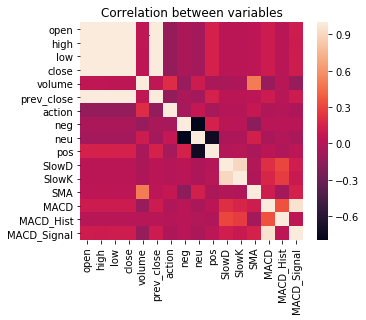

In [34]:
corr = df_all.corr()
f, ax = plt.subplots(figsize=(5, 4))
plt.title("Correlation between variables")
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [37]:
df_all_drop=df_all.drop(columns = ['open','high','low','close','prev_close','volume'])

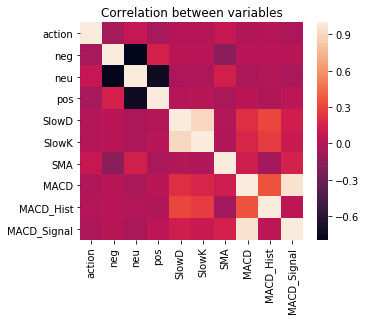

In [38]:
corr = df_all_drop.corr()
f, ax = plt.subplots(figsize=(5, 4))
plt.title("Correlation between variables")
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)